In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, shapiro, f_oneway


In [275]:
df = pd.read_csv('insurance - insurance.csv')

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [276]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [277]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [278]:
alpha = 0.049

# Creating Hypothesis

## ` Q1. Do smokers have higher insurance charges than non-smokers? `

* Null Hypothesis (H₀): Smokers and non-smokers have the same insurance charges.

* Alternative Hypothesis (H₁): Smokers have higher insurance charges than non-smokers.

In [279]:
charges = df['charges']
z_scores = np.abs(stats.zscore(charges))
outlier_threshold = 3
outliers = df[z_scores > outlier_threshold]

In [280]:
df_clean = df.drop(outliers.index)

In [281]:
smokers_charges = df_clean[df_clean['smoker'] == 'yes']['charges']
non_smokers_charges = df_clean[df_clean['smoker'] == 'no']['charges']
_, p_value_smokers = stats.normaltest(smokers_charges)
_, p_value_non_smokers = stats.normaltest(non_smokers_charges)

In [282]:
null_hypothesis = "There is no significant difference in insurance charges between smokers and non-smokers."
alternative_hypothesis = "Smokers have significantly higher insurance charges than non-smokers."

In [283]:
if p_value_smokers < alpha or p_value_non_smokers < alpha:

    _, p_value = stats.mannwhitneyu(smokers_charges, non_smokers_charges, alternative='two-sided')
else:

    _, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges)

In [284]:
if p_value < alpha:
    result = "Reject the null hypothesis. " + alternative_hypothesis
else:
    result = "Fail to reject the null hypothesis."

print(result,'P_Value: ',p_value)

Reject the null hypothesis. Smokers have significantly higher insurance charges than non-smokers. P_Value:  4.878252366804541e-127


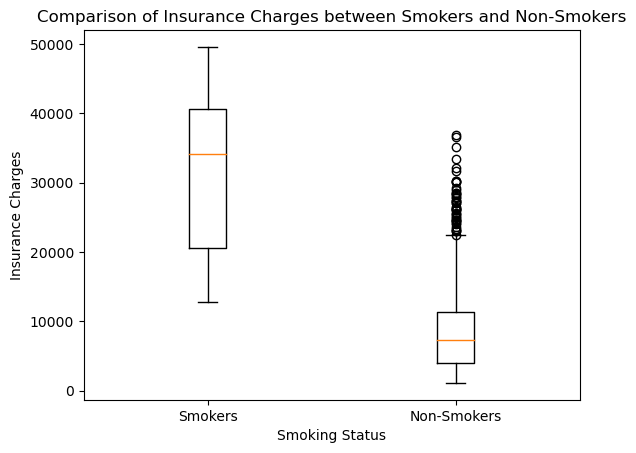

In [285]:
plt.boxplot([smokers_charges, non_smokers_charges], labels=['Smokers', 'Non-Smokers'])
plt.xlabel('Smoking Status')
plt.ylabel('Insurance Charges')
plt.title('Comparison of Insurance Charges between Smokers and Non-Smokers')
plt.show()



***

## ` Q2. Are men more likely to smoke than women? `

* Null Hypothesis (H₀): Men and women are equally as likely to smoke.

* Alternative Hypothesis (H₁): Men are more likely to smoke than women.


In [286]:
null_hypothesis = "There is no significant difference in smoking rates between men and women."
alternative_hypothesis = "Men are more likely to smoke than women."

In [287]:
cross_table = pd.crosstab(df['sex'], df['smoker'])
_, p_value, _, _ = stats.chi2_contingency(cross_table)

In [288]:
if p_value < alpha:
    result = "Reject the null hypothesis. " + alternative_hypothesis
else:
    result = "Fail to reject the null hypothesis."

print(result,'P_Value: ',p_value)

Reject the null hypothesis. Men are more likely to smoke than women. P_Value:  0.006548143503580696


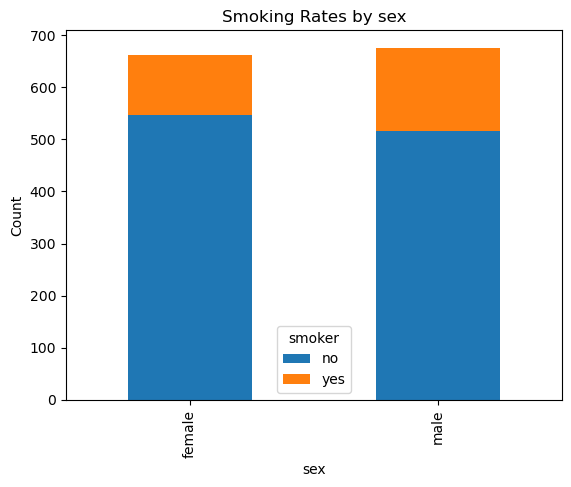

In [289]:
cross_table.plot(kind='bar', stacked=True)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Smoking Rates by sex')
plt.show()



***

 ## ` Q3. Do different regions have different charges, on average? `

* Null Hypothesis (H₀): Different regions on average have similar if not the same charges on average.

* Alternative Hypothesis (H₁): There are different charges on average dissimilar to other regions.


In [290]:
regions = df['region'].unique()
p_values = []
for region in regions:
    charges = df[df['region'] == region]['charges']
    _, p_value = stats.normaltest(charges)
    p_values.append(p_value)


In [291]:
null_hypothesis = "There is no significant difference in insurance charges among different regions."
alternative_hypothesis = "There are significant differences in insurance charges among different regions."

In [292]:
if any(p_value < alpha for p_value in p_values):
    _, p_value = stats.kruskal(*[df[df['region'] == region]['charges'] for region in regions])
else:
    _, p_value = stats.f_oneway(*[df[df['region'] == region]['charges'] for region in regions])

In [293]:
if p_value < alpha:
    result = "Reject the null hypothesis. " + alternative_hypothesis
else:
    result = "Fail to reject the null hypothesis."
    
print(result,'P_Value: ',p_value)

Fail to reject the null hypothesis. P_Value:  0.19232908072121002


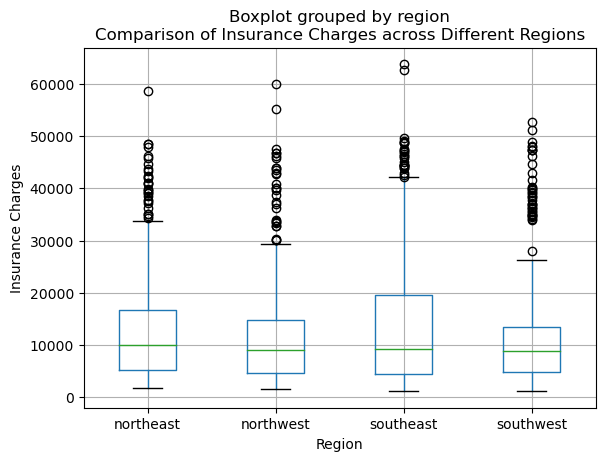

In [294]:
df.boxplot(column='charges', by='region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.title('Comparison of Insurance Charges across Different Regions')
plt.show()